## Gold Price Prediction

### Importing Data

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv("/home/imman/Documents/Imman/Rough Draft/Resources/gold_price.csv")

### Preprocessing Data

In [13]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [11]:
df.shape

(2290, 6)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


#### Checking Nul Values

In [16]:
df.isnull().sum()
#No Null Values

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [17]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


#### Checking Correlation

In [18]:
correlation = df.corr()

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

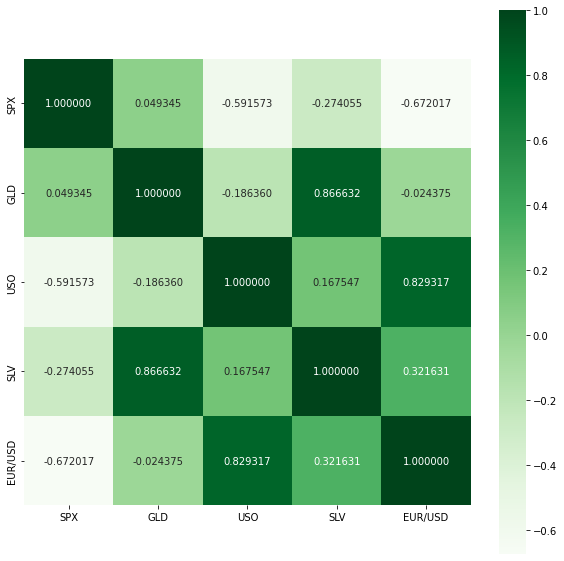

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='1f',annot=True,cmap='Greens')

In [25]:
#Correlation Values of GLD
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

/home/imman/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

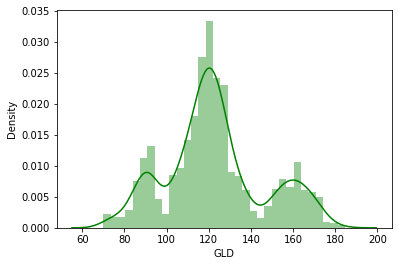

In [26]:
#Checking the distribution of the gld price
sns.distplot(df['GLD'],color='Green')

### Spliting and fitting Data

In [29]:
x = df.drop(['Date','GLD'],axis=1)
y= df['GLD']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

### Model Training **RandomForestRegressor**

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
regressor = RandomForestRegressor(n_estimators=100)

#Training the model
regressor.fit(x_train,y_train)


RandomForestRegressor()

In [39]:
# Prediction the model

test_data_prediction = regressor.predict(x_test)
test_data_prediction

array([168.51549931,  82.28909987, 116.10249975, 127.71260053,
       120.78020139, 154.65289777, 150.17519775, 126.07620128,
       117.45159876, 125.87460091, 116.39260126, 172.0331012 ,
       141.27049808, 167.84659833, 115.23989989, 117.72560039,
       140.32480286, 170.02800071, 159.09830253, 156.61940006,
       155.12280037, 125.16909984, 175.57339958, 156.97490388,
       125.30450039,  93.66209981,  77.77360012, 120.67999985,
       119.11139954, 167.50539885,  88.3581004 , 125.52860036,
        91.04650087, 117.70930023, 121.12319905, 136.33080084,
       115.38860157, 115.3794006 , 147.5045999 , 107.26620074,
       104.75330258,  87.0776977 , 126.39510078, 117.90450037,
       153.44299913, 119.67220022, 108.41609978, 108.17449864,
        92.98410047, 127.05469755,  74.8189002 , 113.77369948,
       120.96879998, 111.2905992 , 118.82179888, 120.9145996 ,
       159.13390068, 169.01610063, 146.94889709,  85.72969875,
        94.38990019,  86.77469886,  90.50679983, 118.81

### R Squared Error

In [42]:
from sklearn import metrics
error_score = metrics.r2_score(y_test,test_data_prediction)
print('R Squared error : ',error_score)

R Squared error :  0.9886974069161181


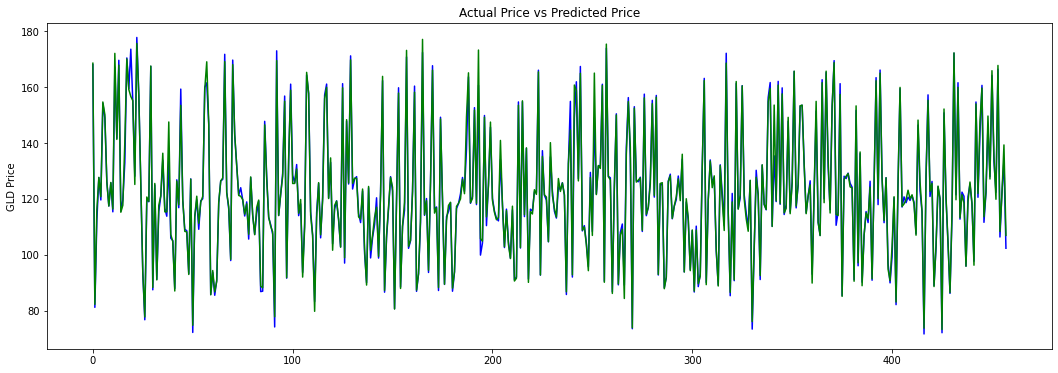

In [48]:
# Compare the Actual values and predicted Values
y_test = list(y_test)
plt.figure(figsize=(18,6))
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title("Actual Price vs Predicted Price")
plt.ylabel("GLD Price")
plt.show()